<a href="https://colab.research.google.com/github/herezlovic/Fake-News-Detection-Using-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!find /content/drive/MyDrive -type f -name "True.csv"
!find /content/drive/MyDrive -type f -name "Fake.csv"


/content/drive/MyDrive/NewsDataset (1)/True.csv
/content/drive/MyDrive/NewsDataset (1)/Fake.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9311 - loss: 0.2233 - val_accuracy: 0.9986 - val_loss: 0.0085
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9983 - val_loss: 0.0081
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9999 - loss: 5.1485e-04 - val_accuracy: 0.9985 - val_loss: 0.0096
281/281 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - accuracy: 0.9985 - loss: 0.0067

✅ Test Accuracy: 0.9984


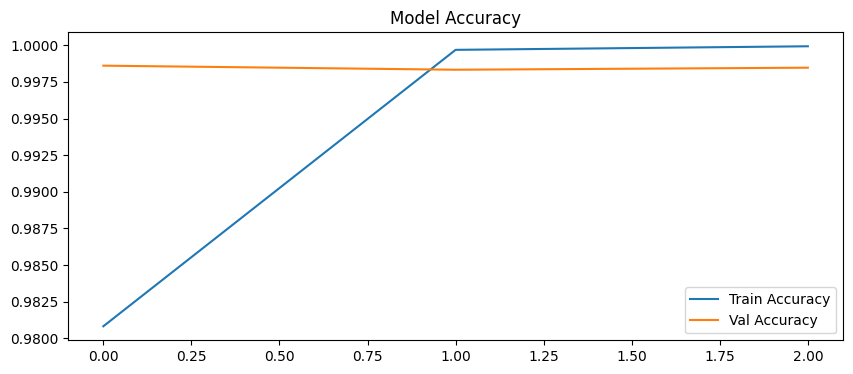

In [ ]:
# ===============================
# 📰 Fake News Detection using Bidirectional LSTM
# ===============================

# ---- INSTALL DEPENDENCIES ----
!pip install tensorflow pandas numpy scikit-learn matplotlib --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ===============================
# ☁️ LOAD DATA FROM GOOGLE DRIVE
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# ✅ Corrected paths
true_path = '/content/drive/MyDrive/NewsDataset (1)/True.csv'
fake_path = '/content/drive/MyDrive/NewsDataset (1)/Fake.csv'

true_df = pd.read_csv(true_path)
true_df['label'] = 0
fake_df = pd.read_csv(fake_path)
fake_df['label'] = 1

df = pd.concat([true_df, fake_df], ignore_index=True).sample(frac=1, random_state=42)
X = df['text'].values
y = df['label'].values

# ===============================
# ✂️ SPLIT DATA
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 🔠 TOKENIZE & PAD
# ===============================
max_words = 20000
max_len = 300

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# ===============================
# 🧠 BUILD MODEL
# ===============================
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

model.summary()

# ===============================
# 🚀 TRAIN MODEL
# ===============================
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=128,
    verbose=1
)

# ===============================
# 📊 EVALUATE
# ===============================
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")

# ===============================
# 📈 PLOT TRAINING
# ===============================
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# ===============================
# 🧾 TEST USER INPUT
# ===============================
user_input = input("Enter a news article: ")
seq = tokenizer.texts_to_sequences([user_input])
pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
prediction = model.predict(pad)[0][0]

if prediction < 0.5:
    print("📰 The news is likely TRUE.")
else:
    print("⚠️ The news is likely FAKE.")
